# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Loading Data

In [2]:
laps = pd.read_csv("../raw_data/new_clean_data.csv")
track_status = pd.read_csv("../raw_data/track_status.csv")
weather = pd.read_csv("../raw_data/weather.csv")
driver_results = pd.read_csv("../raw_data/driver_results.csv")
locations = pd.read_csv("../raw_data/locations.csv")
results = pd.read_csv("../raw_data/results.csv")

/var/folders/6b/wyfstlmd3c54c_2bb3_wfjh40000gn/T/ipykernel_60660/1825537154.py:1: DtypeWarning: Columns (29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  laps = pd.read_csv("../raw_data/new_clean_data.csv")


# Clean laps

In [3]:
#def add_race_progress(df):
    # Group data to get lap number per year per race
    #grouped_data = df.groupby(by = ["Year", "Location"], as_index=False)["LapNumber"].max().rename(columns={"LapNumber":"TotalLaps"})
    #grouped_data["Year_Location"] = grouped_data["Year"].map(str) + grouped_data["Location"]
    # Group data to get same info as grouped_data
    #df["Year_Location"] = df["Year"].map(str) + df["Location"]
    # Merge data
    #df = df.merge(grouped_data, on="Year_Location")
    # Clean data frame
    #df.drop(columns=["Year_Location", "Year_y", "Location_y"], inplace=True)
    #df["RaceProgress"] = df["LapNumber"] / df["TotalLaps"]
    #df.rename(columns={"Location_x": "Location", "Year_x": "Year"}, inplace=True)
    #return df

#laps = add_race_progress(laps)

#def mask_race_percentage(df, percentage):
    #df = df[df["RaceProgress"] > percentage]
    #return df

#laps = mask_race_percentage(laps, 0.1)

#def get_tyre_stress_level(df):
 #   params = {'Mexico City': 4,
  #  'Lusail': 1,
   # 'Shanghai': 2,
    #'Mugello': 1,
    #'#Hockenheim': 3,
    #'Jeddah': 3,
    #'Imola': 3,
    #'São Paulo': 3,
    #'Montréal': 3,
    #'Singapore': 4,
    #'Marina Bay': 4,
    #'Barcelona': 1,
    #'Spain': 1,
    #'Spa-Francorchamps': 1,
    #'Spielberg': 3,
    #'Melbourne': 3,
    #'Budapest': 3,
    #'Nürburgring': 3,
    #'Suzuka': 1,
    #'Austin': 1,
    #'Zandvoort': 1,
    #'Bahrain': 3,
    #'Portimão': 2,
    #'Sochi': 4,
    #'Monza': 1,
    #'Yas Marina': 3,
    #'Monaco': 5,
    #'Miami': 3,
    #'Istanbul': 1,
    #'Baku': 3,
    #'Monte Carlo': 5,
    #'Yas Island': 3,
    #'Le Castellet': 2,
    #'Sakhir': 3,
    #'Silverstone': 1}
    #df["TyreStressLevel"] = df["Location"].map(params)
    #return df

#laps = get_tyre_stress_level(laps)

#TIRE_MATCH = {
 #   'HYPERSOFT': 'SOFT',
  #  'ULTRASOFT': 'SOFT',
   # 'SUPERSOFT': 'SOFT',
    #'SOFT': 'SOFT',
    #'MEDIUM': 'MEDIUM',
    #'HARD': 'HARD',
    #'INTERMEDIATE': 'INTERMEDIATE',
    #'WET': 'WET',
    #'UNKNOWN': 'UNKNOWN'
#}
#def compound_recategorization(laps,tire_mapping):
#    new_laps = laps.copy()
#    new_laps['Compound']=laps['Compound'].map(tire_mapping)
#    return new_laps

#laps = compound_recategorization(laps, TIRE_MATCH)

#def compound_cleaning(laps,tire_mapping,backfilling=3):
#    new_laps = laps.copy()
#    new_laps = compound_recategorization(new_laps,tire_mapping)
#    new_laps['Compound'].replace('UNKNOWN',None,inplace=True)
#    new_laps['Compound'].fillna(method="bfill",limit=backfilling,inplace=True)
#    return new_laps

#laps = compound_cleaning(laps, TIRE_MATCH)
#
#def pitting(df):
#    df['pitting_this_lap'] = np.where(laps['PitInTime'].notna(), True, False)
#    return df

#laps = pitting(laps)

#laps.drop(columns=['Unnamed: 0', 'Time', 'DriverNumber', 'LapTime',
 #      'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
 #      'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
#       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 
#       'LapStartTime', 'LapStartDate', 'Deleted',
     #  'DeletedReason', 'FastF1Generated', 'IsAccurate', 'TrackStatus'], inplace = True)

#laps["Driver"] = laps["Driver"].fillna("OCO")
#laps["IsPersonalBest"] = laps["IsPersonalBest"].fillna(False)

#driver_missing_compound = laps[laps["Compound"].isna()].Driver
#set(driver_missing_compound)

#laps[(laps["Driver"] == "ALO") & (laps["Location"] == "Spa-Francorchamps") & (laps["Year"] == 2021)]

#laps[laps["Team"].isna()]

#laps["Team"] = laps["Team"].fillna("Renault")

#laps[(laps["Location"] == "Spielberg") & (laps["Year"] == 2018) & (laps["Driver"] == "HAR")]

#laps_with_na_position = laps[laps["Position"].isna()]
#laps_with_na_position["Location_Year"] = laps_with_na_position["Location"] + laps_with_na_position["Year"].map(str)

#laps["Position"] = laps["Position"].fillna(method = "ffill")

#laps.drop_duplicates(inplace=True)

#laps["pitting_this_lap"] = laps["pitting_this_lap"].apply(lambda x: 1 if x == True else 0)

#laps

In [4]:
laps['Compound'].value_counts()

Compound
SOFT      22908
HARD      22743
MEDIUM    20823
Name: count, dtype: int64

# Set X & y

In [5]:
X = laps.drop(columns = 'next_compound')
y = laps['next_compound']

In [6]:
le = LabelEncoder()
le.fit(y)
y_le = le.transform(y)
y_cat = to_categorical(y_le, num_classes=None, dtype = 'float32')
y_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Train Test Val Split

In [7]:
laps_for_model = laps.copy()
train_df = laps_for_model[laps_for_model['Year'] < 2022]
val_df = laps_for_model[laps_for_model['Year'] == 2022]
test_df = laps_for_model[laps_for_model['Year'] == 2023]
train_df_shuffled = train_df.sample(frac=1)
val_df_shuffled = val_df.sample(frac=1)
test_df_shuffled = test_df.sample(frac=1)
y_train = train_df_shuffled['next_compound']
y_val = val_df_shuffled['next_compound']
y_test = test_df_shuffled['next_compound']
X_train = train_df_shuffled.drop(columns=['next_compound', 'Time_w', 'Time_min', 'status_list'])
X_val = val_df_shuffled.drop(columns=['next_compound', 'Time_w', 'Time_min', 'status_list'])
X_test = test_df_shuffled.drop(columns=['next_compound', 'Time_w', 'Time_min', 'status_list'])

In [8]:
le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)
y_val_le = le.transform(y_val)
y_train_cat = to_categorical(y_train_le, num_classes=None, dtype = 'float32')
y_test_cat = to_categorical(y_test_le, num_classes=None, dtype = 'float32')
y_val_cat = to_categorical(y_val_le, num_classes=None, dtype = 'float32')

# Preprocessing

In [9]:
feat_numerical = sorted(X.select_dtypes(include=["int64", "float64"]).columns)
feat_numerical

['AirTemp',
 'DriverNumber',
 'Final_Position',
 'Humidity',
 'LapNumber',
 'LastTeamRanking',
 'Position',
 'Pressure',
 'RaceProgress',
 'SpeedFL',
 'SpeedI1',
 'SpeedI2',
 'SpeedST',
 'Stint',
 'TotalLaps',
 'TrackStatus',
 'TrackTemp',
 'TyreLife',
 'TyreStressLevel',
 'Unnamed: 0',
 'Unnamed: 0.1',
 'WindDirection',
 'WindSpeed',
 'Year',
 'status']

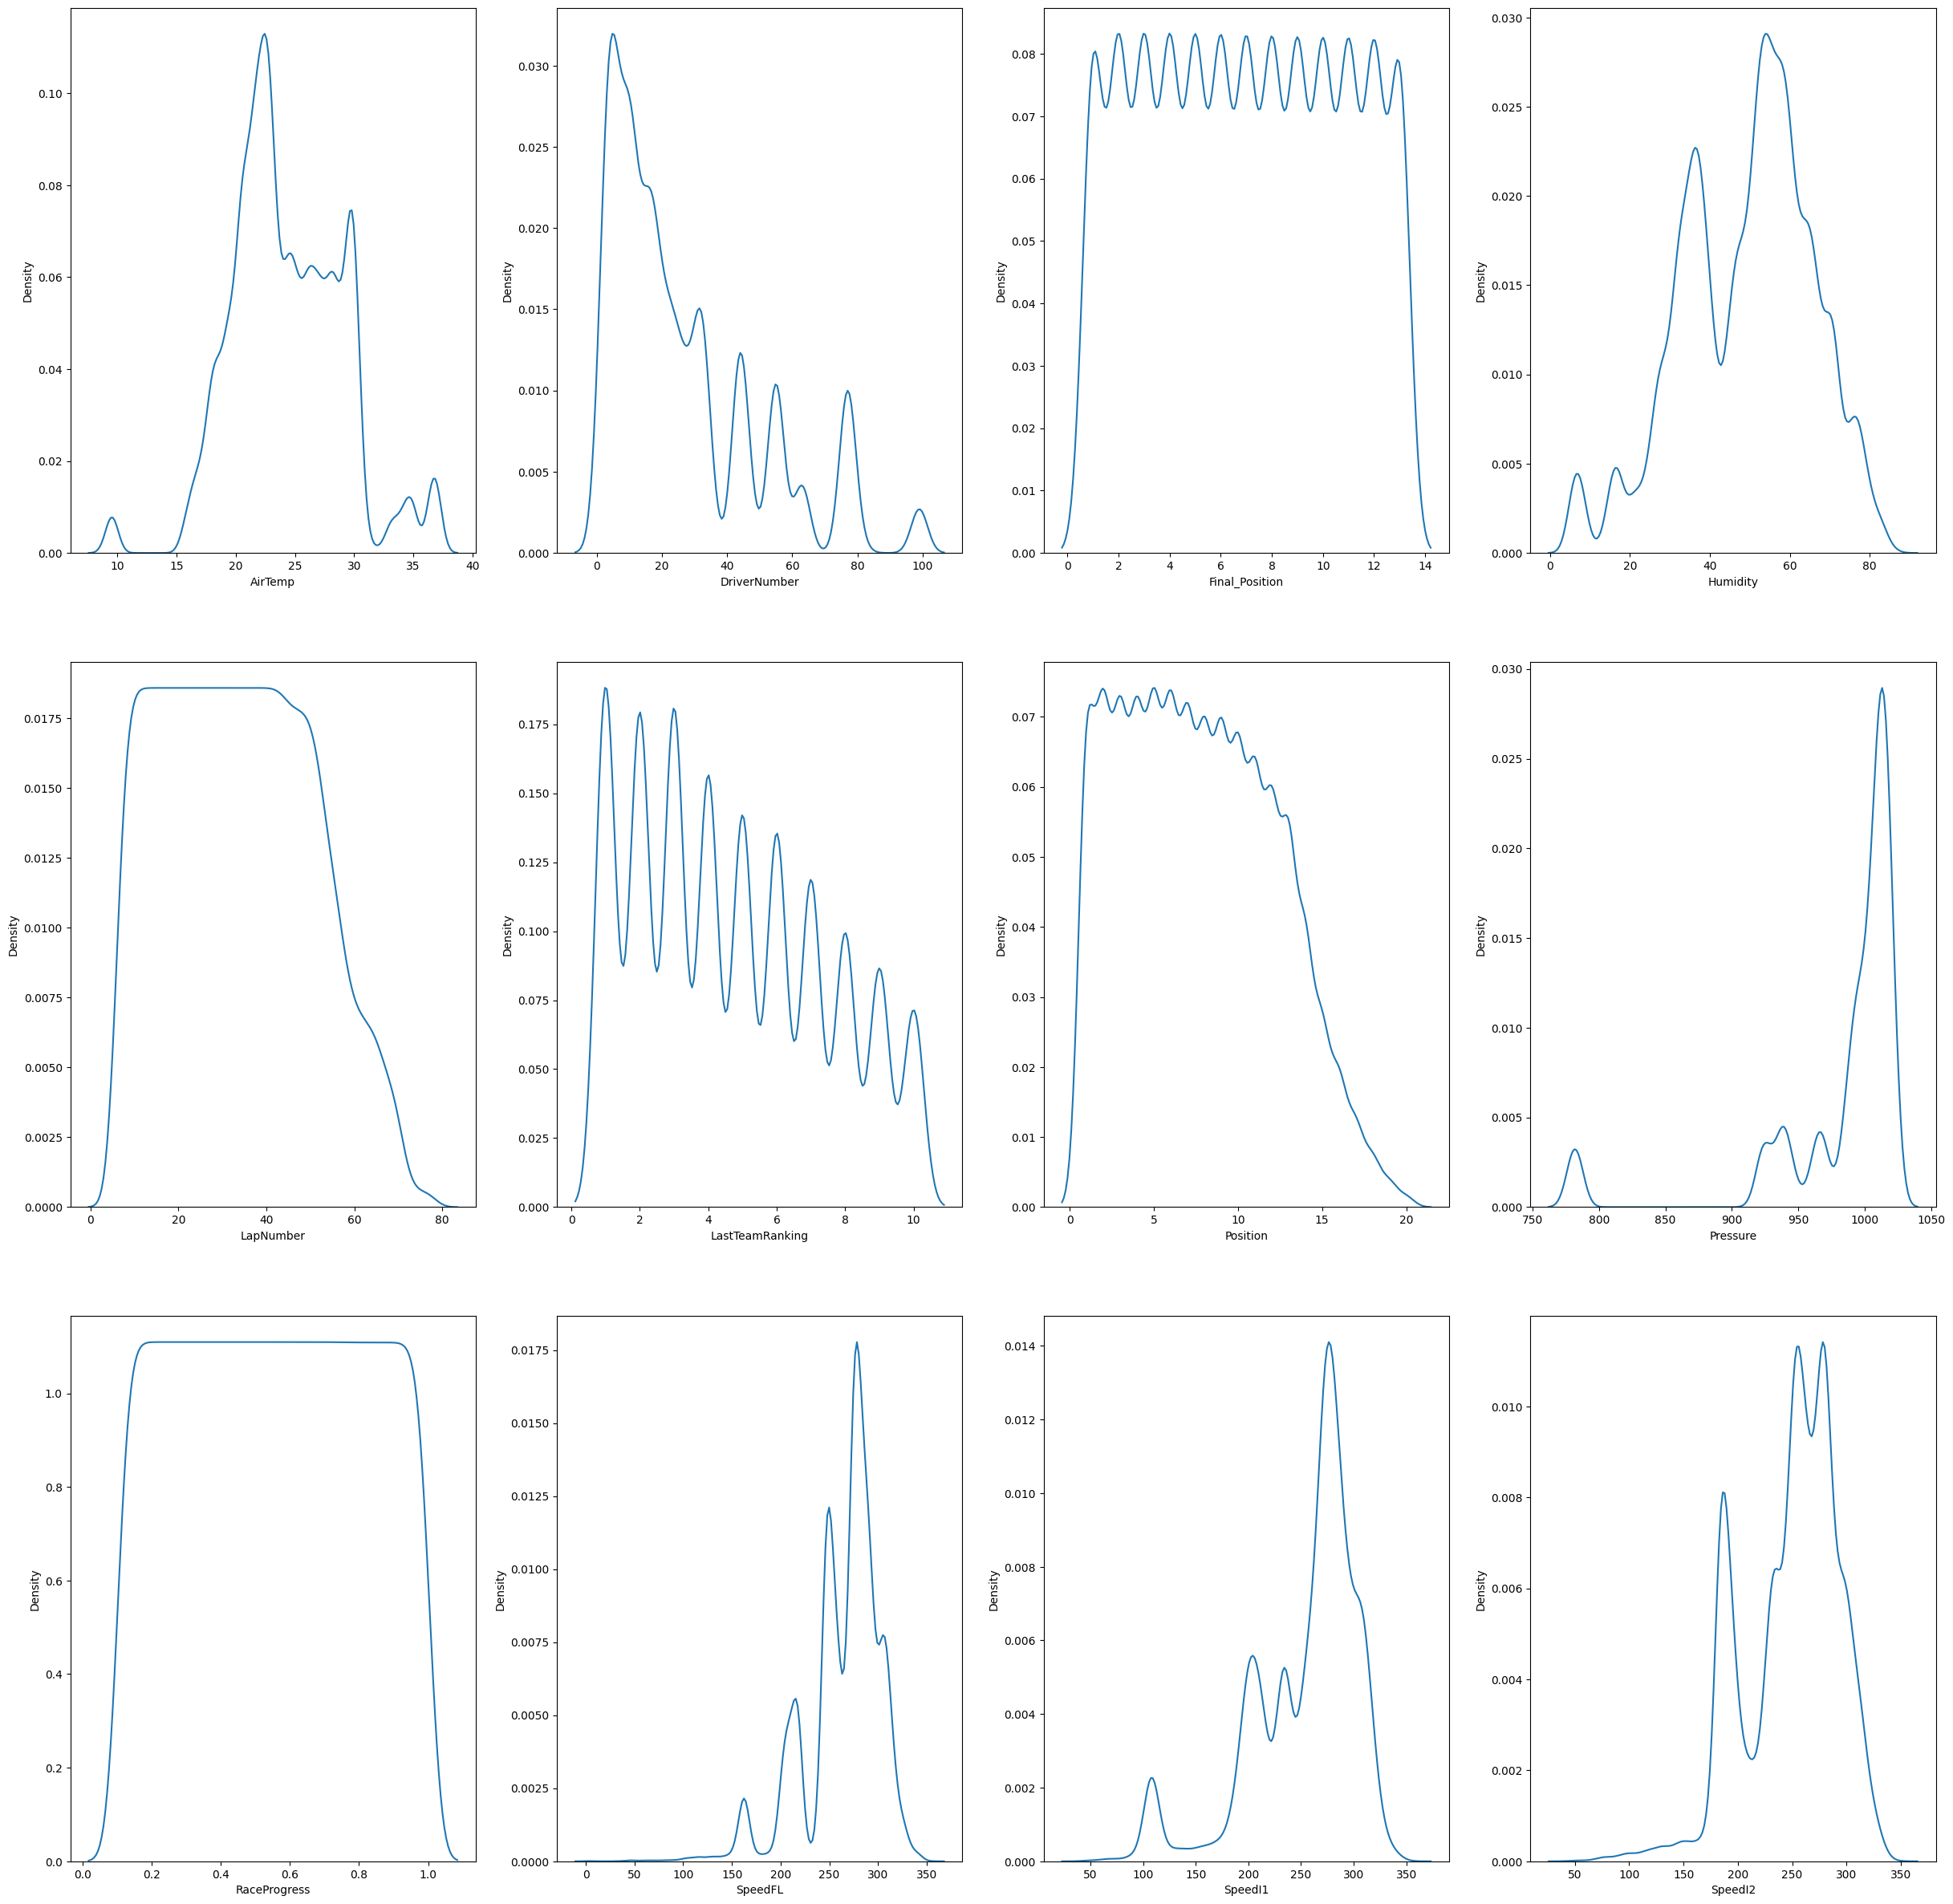

In [10]:
fig, axs = plt.subplots(3,4, figsize=(30, 30))

axs = axs.ravel()

for ax, column in zip(axs, feat_numerical):
    sns.kdeplot(x=column, data=X, ax=ax)

In [11]:
X.dtypes

Unnamed: 0.1            int64
Time                   object
Driver                 object
DriverNumber            int64
LapTime                object
LapNumber             float64
Stint                 float64
PitOutTime             object
PitInTime              object
Sector1Time            object
Sector2Time            object
Sector3Time            object
Sector1SessionTime     object
Sector2SessionTime     object
Sector3SessionTime     object
SpeedI1               float64
SpeedI2               float64
SpeedFL               float64
SpeedST               float64
IsPersonalBest           bool
Compound               object
TyreLife              float64
FreshTyre                bool
Team                   object
LapStartTime           object
LapStartDate           object
TrackStatus           float64
Position              float64
Deleted                  bool
DeletedReason          object
FastF1Generated          bool
IsAccurate               bool
Location               object
Year      

In [ ]:
cat_features = ["Driver", "Team", "IsPersonalBest", "Location", 
'second_compound', 'Compound', 'close_ahead', 'close_behind', 'is_pitting_ahead','is_pitting_behind']
cat_features_preproc = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))
num_features = ["LapNumber", "TyreLife", "Position", "TyreStressLevel", "RaceProgress", "Year", 'LastTeamRanking','status',
                'TrackTemp', 'pitting_next_lap', ]
num_features_preproc = make_pipeline(RobustScaler())

In [ ]:
preproc_baseline = make_column_transformer((cat_features_preproc, cat_features),
                                           (num_features_preproc, num_features),
                                           remainder="passthrough")

In [ ]:
preproc_baseline

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Driver', 'Team', 'IsPersonalBest',
                                  'FreshTyre', 'Location', 'LocationYear',
                                  'second_compound', 'Rainfall', 'Compound',
                                  'close_ahead', 'close_behind',
                                  'is_pitting_ahead', 'is_pitting_behind']),
                                ('pipeline-2',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['LapNumber', 'TyreLife', 'Position',
                                  'TotalLaps', 'TyreStressLevel',
                                  'pitting_this_lap', 'RaceProgress', 'Year',
                                  'LastTeamRanking', 'status', 'AirTemp',
                                  'Humidity', 'Pressure', 'TrackTemp',
                                  'WindDirection', 'WindSpeed',
                                  'Final_Position', 'pitting_next_lap'])])

In [ ]:
preproc_baseline.fit(X_train)
X_train_preproc = preproc_baseline.transform(X_train)
X_test_preproc = preproc_baseline.transform(X_test)
X_val_preproc = preproc_baseline.transform(X_val)

/Users/rosemansion/.pyenv/versions/3.10.6/envs/f1-binottor/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model

In [ ]:
X_train_preproc.shape, y_val_cat.shape , y_train_cat.shape,

((48343, 198), (14131, 3), (48343, 3))

In [ ]:
y_train.unique(), y_val.unique()

(array(['HARD', 'MEDIUM', 'SOFT'], dtype=object),
 array(['SOFT', 'HARD', 'MEDIUM'], dtype=object))

In [ ]:
y_test.unique()

array(['HARD', 'MEDIUM', 'SOFT'], dtype=object)

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential()

model.add(layers.Dense(32, activation="relu", input_dim = 169))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
es = EarlyStopping(patience=100, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5440      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5539 (21.64 KB)
Trainable params: 5539 (21.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
laps.columns

Index(['Unnamed: 0.1', 'Time', 'Driver', 'DriverNumber', 'LapTime',
       'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time',
       'Sector2Time', 'Sector3Time', 'Sector1SessionTime',
       'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2',
       'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife',
       'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus',
       'Position', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate',
       'Location', 'Year', 'LastTeamRanking', 'second_compound', 'status',
       'status_list', 'TotalLaps', 'RaceProgress', 'pitting_this_lap',
       'TyreStressLevel', 'Time_min', 'Unnamed: 0', 'Time_w', 'AirTemp',
       'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection',
       'WindSpeed', 'Final_Position', 'LocationYear', 'close_ahead',
       'close_behind', 'is_pitting_ahead', 'is_pitting_behind',
       'pitting_next_lap', 'next_compound'],
      dtype='object')

In [ ]:
X_train_preproc[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,
       0.2222222222222222, -0.8666666666666667, -0.7142857142857143, 0.0,
       0.0, 0.0, 0.274985919018712, 0.6666666666666666, -0.4, 0.0,


In [ ]:
history = model.fit(X_train_preproc, y_train_cat, 
          batch_size=256, epochs=1500, 
          validation_data=(X_val_preproc, y_val_cat),
          callbacks=[es])
history

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
y_pred = model.predict(X_test_preproc)
y_pred

113/113 [==============================] - 0s 363us/step


array([[9.9643457e-01, 3.2919836e-03, 2.7348651e-04],
       [9.9836427e-01, 1.1412066e-03, 4.9455918e-04],
       [9.9832660e-01, 1.3948247e-03, 2.7863044e-04],
       ...,
       [1.2724262e-01, 8.7009710e-01, 2.6603383e-03],
       [9.7527063e-01, 1.9645374e-02, 5.0839712e-03],
       [9.9872071e-01, 1.1198760e-03, 1.5940329e-04]], dtype=float32)

In [ ]:
y_pred[0].argmax()

0

In [ ]:
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())
        
y_pred_encode

[0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,


In [ ]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
y_classes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_acc

0.7075

In [ ]:
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')
baseline_f1

0.828696925329429

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5440      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5539 (21.64 KB)
Trainable params: 5539 (21.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

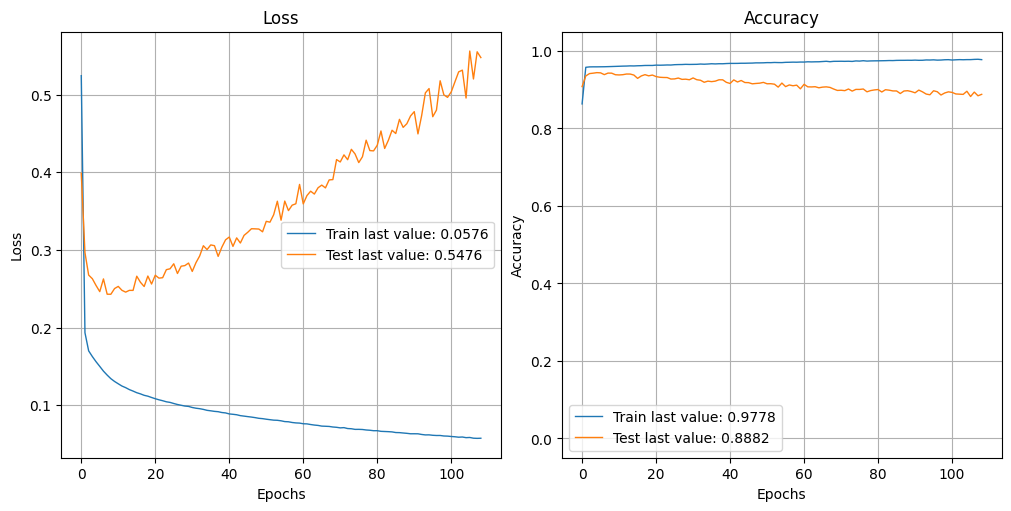

In [ ]:
from plot_keras_history import plot_history
plot_history(history)

# Model 2

In [ ]:
model = models.Sequential()

model.add(layers.Dense(32, activation="relu", input_dim = 169))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(4, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
y_pred = model.predict(X_test_preproc)
y_pred

113/113 [==============================] - 0s 397us/step


array([[0.3341963 , 0.33082217, 0.33498153],
       [0.3367443 , 0.31815788, 0.34509784],
       [0.3350461 , 0.32792106, 0.3370328 ],
       ...,
       [0.3388017 , 0.32754564, 0.33365262],
       [0.3414991 , 0.32568997, 0.33281097],
       [0.33800673, 0.3289442 , 0.33304903]], dtype=float32)

In [ ]:
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())
        
y_pred_encode

[2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,


In [ ]:
baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_acc

0.7727777777777778

In [ ]:
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')
baseline_f1

0.8718270134753996

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                5440      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 4)                

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

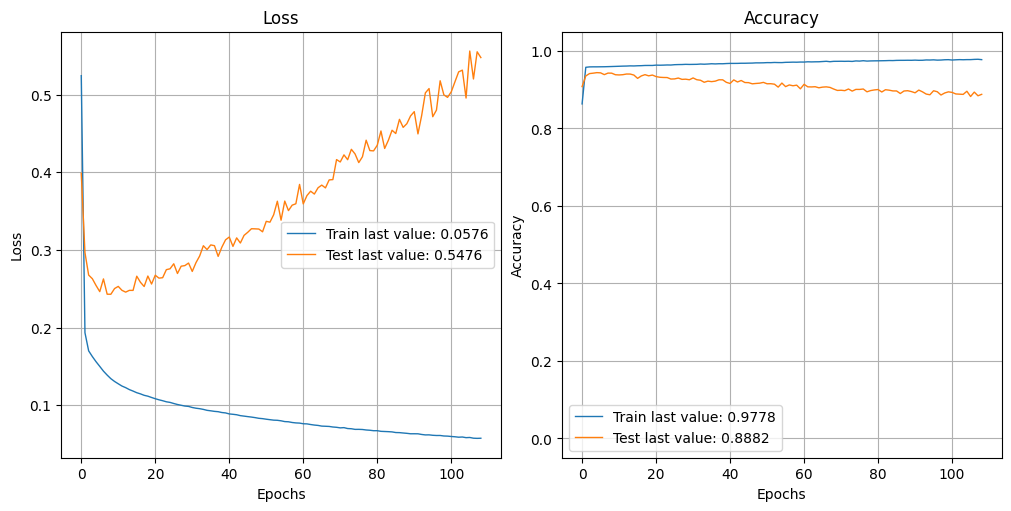

In [ ]:
from plot_keras_history import plot_history
plot_history(history)

# Model 3 (every layer 32)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(32, activation="relu", input_dim = 169))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1

113/113 [==============================] - 0s 413us/step


(0.058333333333333334, 0.11023622047244094)

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

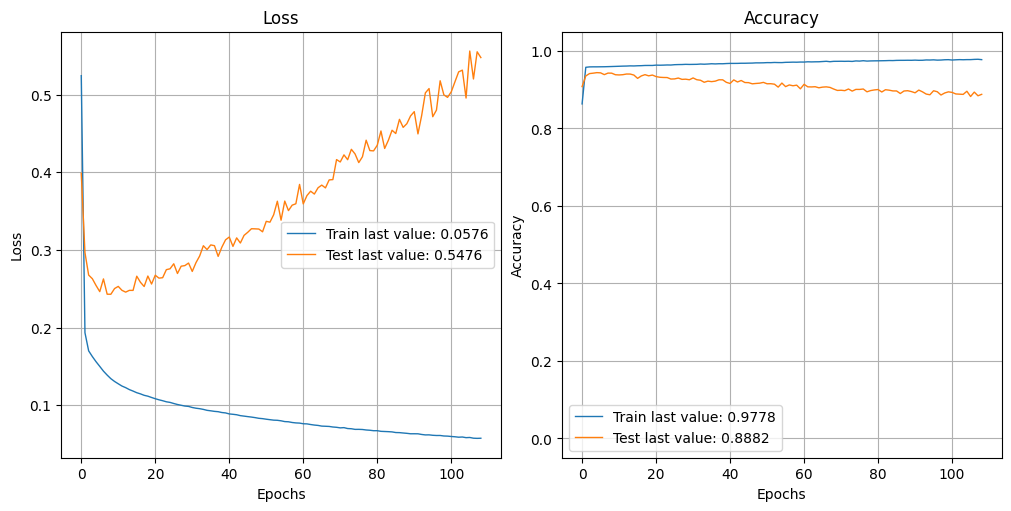

In [ ]:
plot_history(history)

# Model 4 (everything 64)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_dim = 169))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

113/113 [==============================] - 0s 432us/step


(0.07138888888888889,
 0.13326419497018407,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

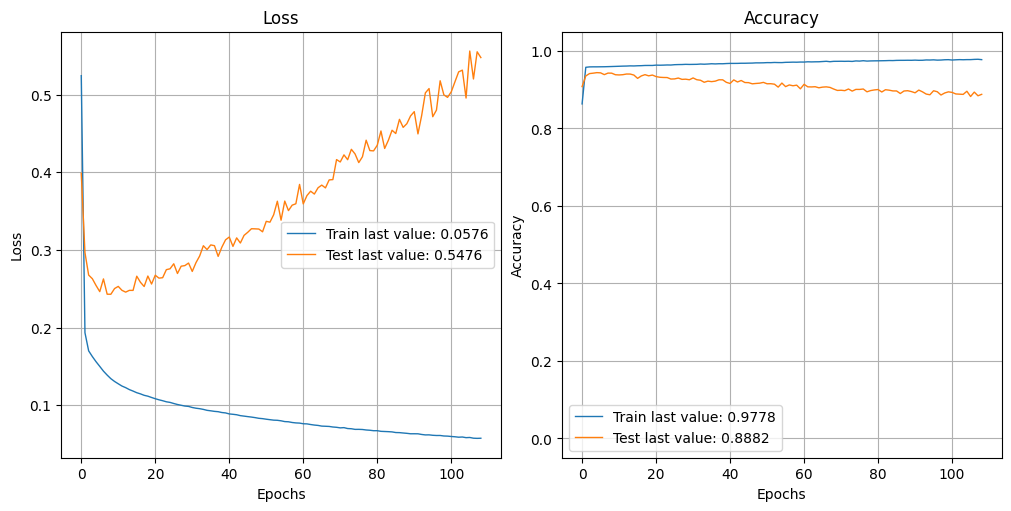

In [ ]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

# Model 5

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_dim = 169))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(8, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

113/113 [==============================] - 0s 403us/step


(0.8213888888888888,
 0.9019368613695287,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

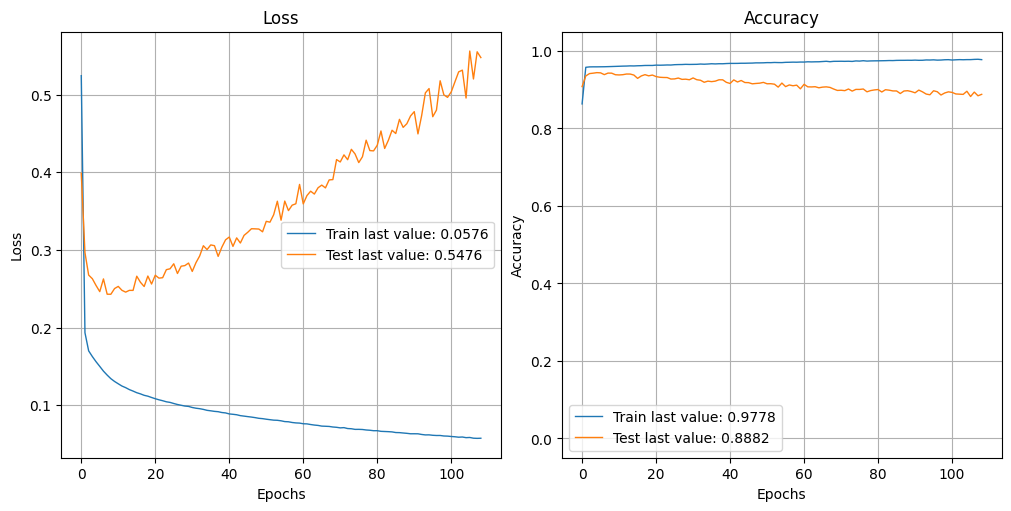

In [ ]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

# Model 6

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_dim = 169))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(1, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

113/113 [==============================] - 0s 416us/step


(1.0,
 1.0,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

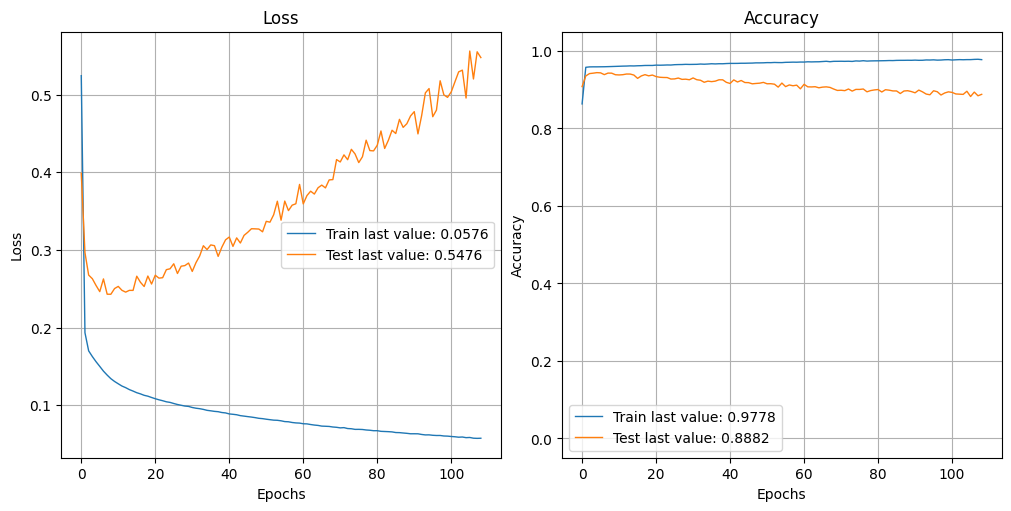

In [ ]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

# Model 7

In [ ]:
#l1 premiere couche 
#l2 et/ou dropout sur les autres 

model = models.Sequential()

model.add(layers.Dense(128, activation="relu", input_dim = 169))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               21760     
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 32)                1056      
                                                                 
 dense_48 (Dense)            (None, 3)                

In [ ]:
es = EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train_preproc, y_train_cat, 
          batch_size=256, epochs=1500, 
          validation_data=(X_val_preproc, y_val_cat),
          callbacks=[es])
history

Epoch 1/1500
159/159 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9223 - val_loss: 0.2633 - val_accuracy: 0.9406
Epoch 2/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9595 - val_loss: 0.2862 - val_accuracy: 0.9189
Epoch 3/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9609 - val_loss: 0.3038 - val_accuracy: 0.9090
Epoch 4/1500
159/159 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9615 - val_loss: 0.3219 - val_accuracy: 0.8961
Epoch 5/1500
159/159 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9645 - val_loss: 0.4335 - val_accuracy: 0.8743
Epoch 6/1500
159/159 [==============================] - 1s 4ms/step - loss: 0.0918 - accuracy: 0.9641 - val_loss: 0.3830 - val_accuracy: 0.9050
Epoch 7/1500
159/159 [==============================] - 1s 7ms/step - loss: 0.0847 - accuracy: 0.9675 - val_loss: 0.4444 - val_accuracy:

113/113 [==============================] - 0s 466us/step


(0.7438888888888889,
 0.8531379420197516,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

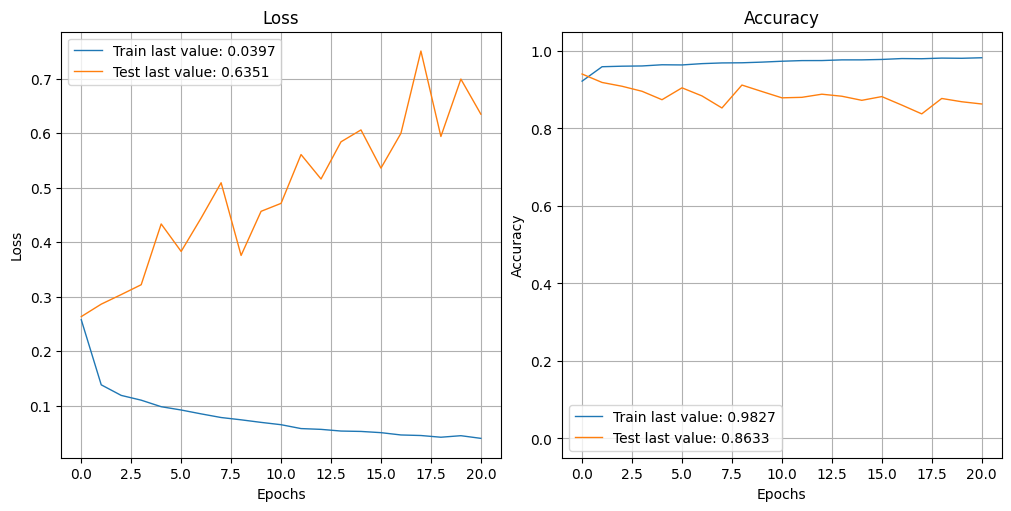

In [ ]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

In [ ]:
X_test_eval_df = X_test.copy()
y_test_eval_df = y_test.copy()
X_test_eval_df['RealCompound'] = y_test_eval_df
X_test_eval_df['ModelCompound'] = y_pred_encode
X_test_eval_df.sort_values(by = ['Driver', 'Location', 'LapNumber'], inplace=True)
X_test_eval_df[(X_test_eval_df['Driver'] == 'LEC') & (X_test_eval_df['Location'] == 'Jeddah')]

,Driver,LapNumber,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,Position,Location,Year,...,WindSpeed,Final_Position,LocationYear,close_ahead,close_behind,is_pitting_ahead,is_pitting_behind,pitting_next_lap,RealCompound,ModelCompound
52796,LEC,6.0,True,SOFT,6.0,True,Ferrari,9.0,Jeddah,2023,...,1.5,7.0,Jeddah 2023,False,False,False,False,False,SOFT,2
52797,LEC,7.0,False,SOFT,7.0,True,Ferrari,8.0,Jeddah,2023,...,0.6,7.0,Jeddah 2023,False,False,False,False,False,SOFT,0
52798,LEC,8.0,False,SOFT,8.0,True,Ferrari,8.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,False,True,False,False,False,SOFT,0
52799,LEC,9.0,False,SOFT,9.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,True,False,False,False,False,SOFT,0
52800,LEC,10.0,False,SOFT,10.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,True,True,False,False,False,SOFT,0
52801,LEC,11.0,True,SOFT,11.0,True,Ferrari,7.0,Jeddah,2023,...,1.1,7.0,Jeddah 2023,False,True,False,False,False,SOFT,2
52802,LEC,12.0,False,SOFT,12.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,False,True,False,False,False,SOFT,0
52803,LEC,13.0,False,SOFT,13.0,True,Ferrari,6.0,Jeddah,2023,...,1.0,7.0,Jeddah 2023,False,True,False,False,False,SOFT,0
52804,LEC,14.0,True,SOFT,14.0,True,Ferrari,5.0,Jeddah,2023,...,0.8,7.0,Jeddah 2023,True,True,False,False,False,SOFT,2
52805,LEC,15.0,False,SOFT,15.0,True,Ferrari,5.0,Jeddah,2023,...,0.8,7.0,Jeddah 2023,True,False,False,False,False,HARD,0


# Final Model

In [ ]:
model = models.Sequential()

model.add(layers.Dense(128, activation="relu", input_dim=169, kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 128)               21760     
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 3)                

In [ ]:
es = EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train_preproc, y_train_cat, 
          batch_size=256, epochs=1500, 
          validation_data=(X_val_preproc, y_val_cat),
          callbacks=[es])
history

Epoch 1/1500
159/159 [==============================] - 1s 3ms/step - loss: 1.1638 - accuracy: 0.9097 - val_loss: 0.5764 - val_accuracy: 0.9443
Epoch 2/1500
159/159 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.9590 - val_loss: 0.4271 - val_accuracy: 0.9446
Epoch 3/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.9595 - val_loss: 0.4097 - val_accuracy: 0.9348
Epoch 4/1500
159/159 [==============================] - 1s 3ms/step - loss: 0.2974 - accuracy: 0.9594 - val_loss: 0.3606 - val_accuracy: 0.9423
Epoch 5/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.9598 - val_loss: 0.3571 - val_accuracy: 0.9391
Epoch 6/1500
159/159 [==============================] - 1s 7ms/step - loss: 0.2503 - accuracy: 0.9599 - val_loss: 0.3484 - val_accuracy: 0.9381
Epoch 7/1500
159/159 [==============================] - 1s 4ms/step - loss: 0.2374 - accuracy: 0.9600 - val_loss: 0.3263 - val_accuracy:

113/113 [==============================] - 0s 487us/step


(0.7105555555555556,
 0.8307892172783372,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

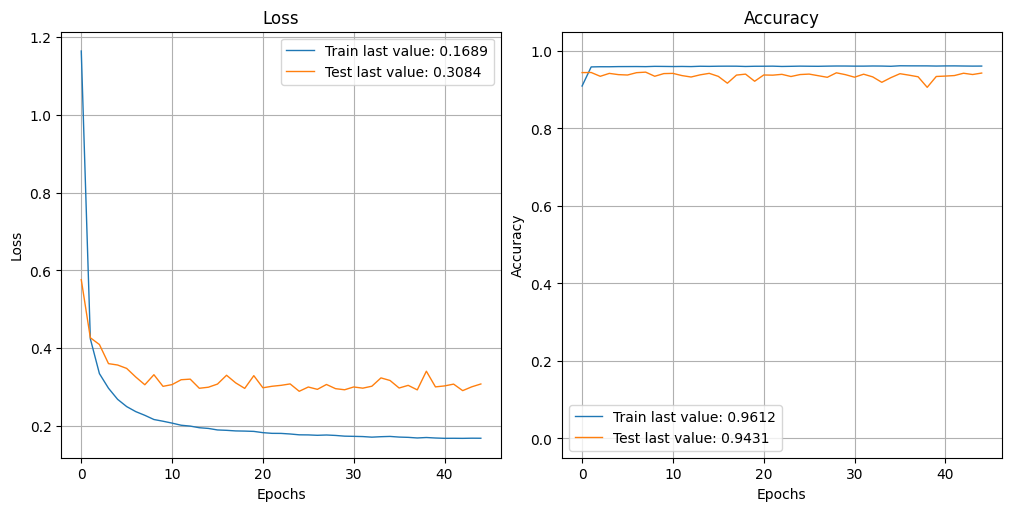

In [ ]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

In [ ]:
X_test_eval_df = X_test.copy()
y_test_eval_df = y_test.copy()
X_test_eval_df['RealCompound'] = y_test_eval_df
X_test_eval_df['PredictedCompound'] = y_pred_encode
X_test_eval_df.sort_values(by = ['Driver', 'Location', 'LapNumber'], inplace=True)
X_test_eval_df[(X_test_eval_df['Driver'] == 'HAM') & (X_test_eval_df['Location'] == 'Jeddah')]

NameError: name 'y_pred_encode' is not defined

In [ ]:
model.evaluate(X_test_preproc,y_test_cat)

113/113 [==============================] - 0s 680us/step - loss: 0.2624 - accuracy: 0.9456


[0.26239314675331116, 0.945555567741394]

In [ ]:
laps['pitting_next_lap'].value_counts()

pitting_next_lap
False    55176
Name: count, dtype: int64

# 